In [85]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [121]:
# %%time
# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!

    G = snap.TUNGraph.New()
    for idx in range(N):
        G.AddNode(idx)
        
    while (G.GetEdges() < E):
        edges = np.random.choice(range(5242),2,replace=False)
        G.AddEdge(int(edges[0]),int(edges[1]))
    ############################################################################
    return G

random_graph = genErdosRenyi()
assert random_graph.GetNodes() == 5242
# print('edges : ',  G.GetEdges())
assert random_graph.GetEdges() == 14484

In [54]:
# config
N = 5242
# def add_edge(G, node_id, src, dst):
#     G.
def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    G = snap.TUNGraph.New()
    for idx in range(N):
        G.AddNode(idx)
        
    for idx in range(N):
        if idx == (N-1):
            G.AddEdge(N-1,0)
        else:
            G.AddEdge(idx,idx+1)
    ############################################################################
    return G

# testing it
G = genCircle()
assert G.GetNodes() == 5242
assert G.GetEdges() == 5242


def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    for idx in range(N):
        if idx == (N-1):
            Graph.AddEdge(idx, 1)
        elif idx == (N-2):
            Graph.AddEdge(idx, 0)
        else:
            Graph.AddEdge(idx, idx+2)

    ############################################################################
    return Graph

G = connectNbrOfNbr(G)
assert G.GetNodes() == N
assert G.GetEdges() == N * 2

def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    num_edges = Graph.GetEdges()
    num_nodes = Graph.GetNodes()
    while Graph.GetEdges() < (num_edges + M):
        edge = np.random.choice(range(num_nodes),2,replace=False)
        Graph.AddEdge(int(edge[0]), int(edge[1]))
    ############################################################################
    return Graph

G = connectRandomNodes(G)
print('num edges: ', G.GetEdges() )
assert G.GetEdges() == 2*N + 4000

num edges:  14484


In [139]:
def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph

smallworld_graph = genSmallWorld(N=5242, E=14484)
assert smallworld_graph.GetEdges() == 14484
assert smallworld_graph.GetNodes() == 5242

In [63]:
# !wget http://snap.stanford.edu/data/ca-GrQc.txt.gz
# !gunzip ca-GrQc.txt.gz  
!ls

ca-GrQc.txt                 hw1.pdf
hw1-bundle.tgz              hw1_q1.ipynb
hw1-q1-starter.py           hw1_submission_template.pdf
hw1-q2.graph                hw1_submission_template.tex


In [136]:
!head -n 7 ca-GrQc.txt

In [145]:
def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed

    Do not forget to remove the self edges!
    """
    ############################################################################
    df = pd.read_csv('ca-GrQc.txt',skiprows=4,sep='\t', header=None)
    df.columns = ['src','dst']
    df['src'] = df['src'].astype(int)
    df['dst'] = df['dst'].astype(int)
    rw_graph = snap.TUNGraph.New()
    for idx, row in enumerate(df.itertuples()):
        if not rw_graph.IsNode(row.src):
            rw_graph.AddNode(row.src)
        if not rw_graph.IsNode(row.dst):
            rw_graph.AddNode(row.dst)
        
        if row.src == row.dst:
            continue
        rw_graph.AddEdge(row.src,row.dst)

    ############################################################################
    return rw_graph

collab_graph = loadCollabNet('ca-GrQc.txt')

assert collab_graph.GetNodes() == 5242
assert collab_graph.GetEdges() == 14484

In [172]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    degs = [node.GetOutDeg() for node in Graph.Nodes()]
    df = pd.Series(degs,name='deg').value_counts().reset_index().rename(columns={'index':'deg','deg':'count'})
    df['count_ratio'] = df['count']/df['count'].sum()
    df = df.sort_values('deg',ascending=True)
    
    
    X, Y = df['deg'],df['count_ratio']

    ############################################################################
    return X, Y


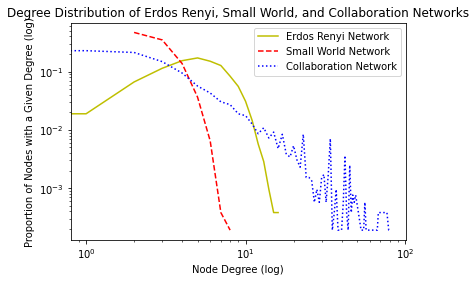

In [173]:
def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()

Q1_1()